In [1]:
%cd ~/dissertation_code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

/home/tntech.edu/kebrown46/dissertation_code


In [2]:
def map_axis_names(n):
    mapper = {
        "Validation Fidelity": "Validation Fidelity",
        "No. Subgroups": "Number of Subgroups (equiv. Number of Rules)", 
        "alpha": "α"
    }
    return mapper[n]
    
def map_dataset_names_proper(d):
    map_ = {
        "trauma_uk": "Trauma",
        "diabetes": "Diabetes",
        "critical_outcome": "Critical Outcome",
        "ED_3day_readmit": "3-Day Readmit",
        "hospitalization_prediction": "Hospitalization Prediction"
    }
    return map_[d]

def map_model_names_proper(m):
    map_ = {
        "NN-dropout": "ANN",
        "catboost-ve": "GBT"
    }
    return map_[m]

In [3]:
def read_tuning_file(dataset, model, iteration, n_bins, res_key = ""):
    if res_key != "":
        fn = f"RQ 3/results/{res_key}/RSDTuning_{model}_{dataset}_{iteration}_bins{n_bins}.csv"
    else:
        fn = f"RQ 3/results/RSDTuning_{model}_{dataset}_{iteration}_bins{n_bins}.csv"
    return pd.read_csv(fn)

def get_average_metric(metric, dataset, model, n_bins, res_key):
    arrays = []
    for i in range(10):
        df = read_tuning_file(dataset, model, i, n_bins, res_key)
        arrays.append(df[metric])
    arrays = np.vstack(arrays)
    x = df["alpha"]
    y = np.average(arrays, axis=0)
    return x, y



def plot_metric(metric, model, n_bins, res_key):
    datasets = ["trauma_uk", "critical_outcome", "ED_3day_readmit", "hospitalization_prediction", "diabetes",]
    for dataset in datasets:
        x, y = get_average_metric(metric, dataset, model, n_bins, res_key)
        d_name = map_dataset_names_proper(dataset)
        plt.plot(x, y, label=d_name)
        
    xname = map_axis_names("alpha")
    yname = map_axis_names(metric)
    mdl_name = map_model_names_proper(model)
    plt.xlabel(f"{xname}")
    plt.ylabel(f"Average {yname}")
    plt.legend()
    plt.title(mdl_name)
    plt.savefig(f"RQ 3/results/{res_key}/RSDtuning_{mdl_name}_{metric}_nbins{n_bins}.png")
    plt.show()

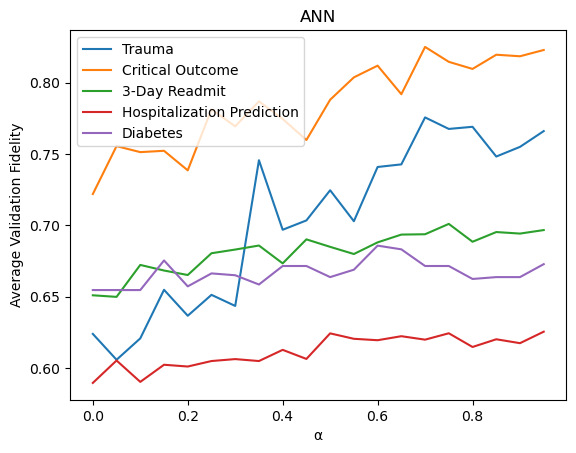

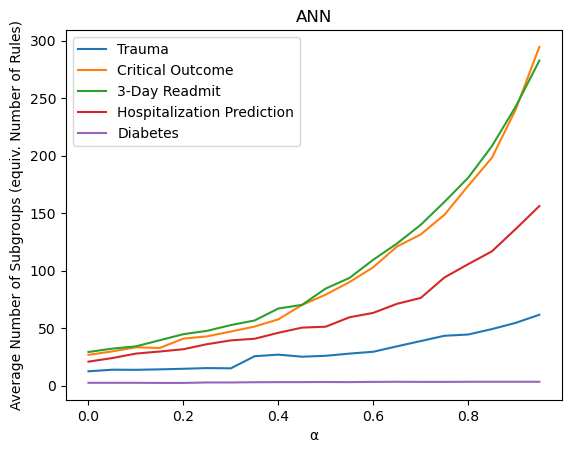

In [4]:
plot_metric(metric="Validation Fidelity", model="NN-dropout", n_bins=2, res_key="dissertation_SG")
# plot_metric(metric="Validation Fidelity", model="catboost-ve", n_bins=2, res_key="dissertation_SG")
plot_metric(metric="No. Subgroups", model="NN-dropout", n_bins=2, res_key="dissertation_SG")
# plot_metric(metric="No. Subgroups", model="catboost-ve", n_bins=2, res_key="dissertation_SG")

# plot_metric(metric="Validation Fidelity", model="NN-dropout", n_bins=3, res_key="dissertation_SG")
# plot_metric(metric="Validation Fidelity", model="catboost-ve", n_bins=3, res_key="dissertation_SG")
# plot_metric(metric="No. Subgroups", model="NN-dropout", n_bins=3, res_key="dissertation_SG")
# plot_metric(metric="No. Subgroups", model="catboost-ve", n_bins=3, res_key="dissertation_SG")

In [5]:
def tradeoff_avg(x_col, y_col, dataset, model, n_bins, res_key = ""):
    xs, ys = [], []
    mean_x_axis = []
    for i in range(10):
        # print(i)
        df = read_tuning_file(dataset, model, i, n_bins, res_key = res_key)   
        df.sort_values(by=x_col, ascending=True, inplace=True)
        x_ = df[x_col]
        y_ = df[y_col]
        mean_x_axis.extend(x_)
        xs.append(x_)
        ys.append(y_)
    
    mean_x_axis = np.unique(np.asarray(mean_x_axis))
    new_ys = []
    for i in range(len(xs)):
        # print(i)
        # print(xs[i], ys[i])
        _y_ = np.interp(mean_x_axis,xs[i], ys[i])
        new_ys.append(_y_)
    mean_y_axis = np.mean(new_ys, axis=0)
    
    print(mean_x_axis.shape, mean_y_axis.shape)
    # plt.plot(mean_x_axis, mean_y_axis)
    xname = map_axis_names(x_col)
    yname = map_axis_names(y_col)
    data_name = map_dataset_names_proper(dataset)
    mdl_name = map_model_names_proper(model)
    # plt.xlabel(f"{xname}")
    # plt.ylabel(f"Average {yname}")
    # plt.title(f"{mdl_name} - {data_name}")
    # plt.savefig(f"RQ 3/results/{res_key}/tuning_{dataset}_{model}_{x_col}_nbins{n_bins}.png")
    # plt.show()
    res = pd.DataFrame({"x": mean_x_axis, "y": mean_y_axis})
    res.to_csv(f"RQ 3/results/{res_key}/tradeoff_{x_col}_{y_col}_{dataset}_{model}_bins{n_bins}.csv")
    return {"x": mean_x_axis, "y": mean_y_axis}


(53,) (53,)
(119,) (119,)
(123,) (123,)
(95,) (95,)
(3,) (3,)


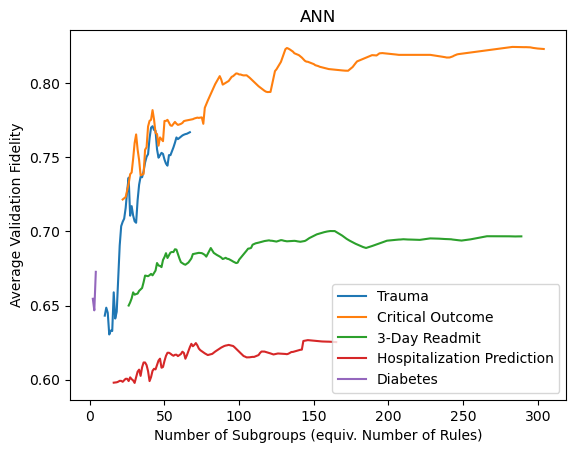

In [6]:
def generate_plot(model, n_bins, res_key): 
    datasets = ["trauma_uk", "critical_outcome", "ED_3day_readmit", "hospitalization_prediction", "diabetes",]
    for dataset in datasets:
        res = tradeoff_avg(x_col="No. Subgroups", 
                             y_col="Validation Fidelity", 
                             dataset=dataset, 
                             model=model, 
                             n_bins=n_bins, 
                             res_key = res_key)
        x = res["x"]
        y = res["y"]
        d_name = map_dataset_names_proper(dataset)
        plt.plot(x, y, label=d_name)
        
    xname = map_axis_names("No. Subgroups")
    yname = map_axis_names("Validation Fidelity")
    mdl_name = map_model_names_proper(model)
    plt.xlabel(f"{xname}")
    plt.ylabel(f"Average {yname}")
    plt.legend()
    plt.title(mdl_name)
    plt.savefig(f"RQ 3/results/{res_key}/RSDtuning_{mdl_name}_nosub_fidelity_nbins{n_bins}.png")
    plt.show()
    
generate_plot(model="NN-dropout", n_bins=2, res_key="dissertation_SG")

(53,) (53,)
(119,) (119,)
(123,) (123,)
(95,) (95,)
(3,) (3,)


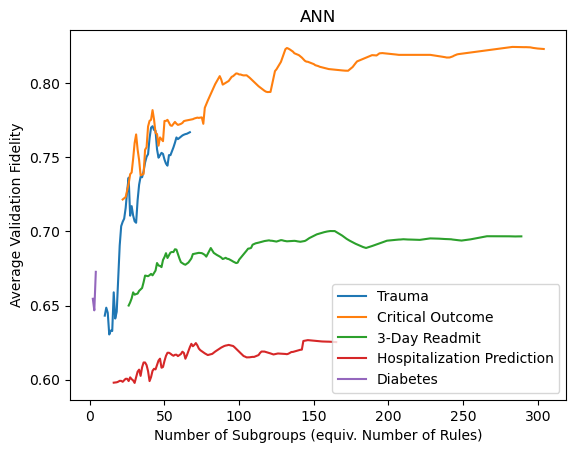

(60,) (60,)
(118,) (118,)
(135,) (135,)
(128,) (128,)
(6,) (6,)


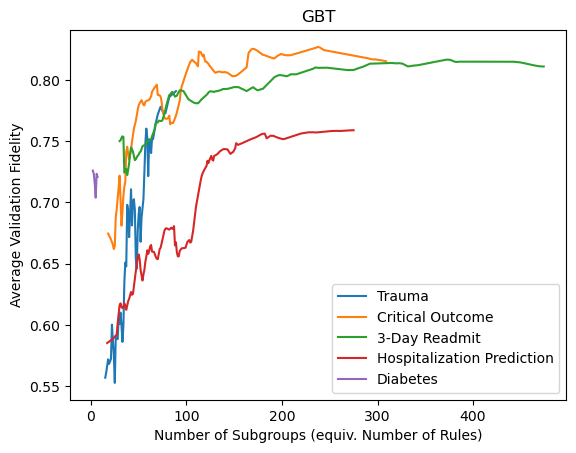

(50,) (50,)
(118,) (118,)
(112,) (112,)
(95,) (95,)
(4,) (4,)


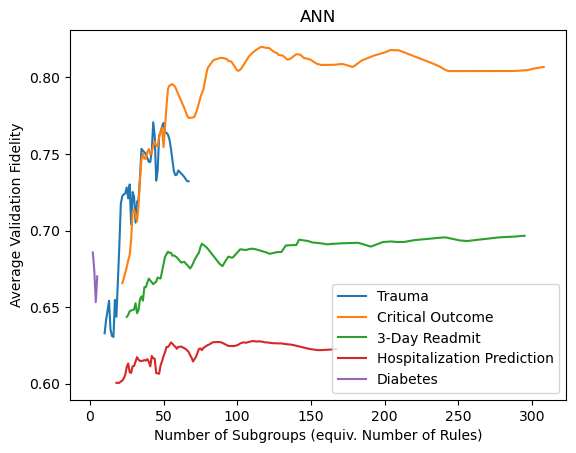

(58,) (58,)
(120,) (120,)
(132,) (132,)
(127,) (127,)
(6,) (6,)


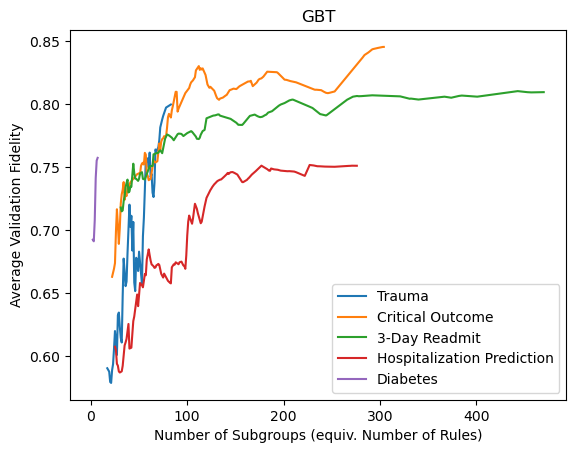

In [7]:
generate_plot(model="NN-dropout", n_bins=2, res_key="dissertation_SG")
generate_plot(model="catboost-ve", n_bins=2, res_key="dissertation_SG")
generate_plot(model="NN-dropout", n_bins=3, res_key="dissertation_SG")
generate_plot(model="catboost-ve", n_bins=3, res_key="dissertation_SG")

In [8]:
def juxtaposed_plot(model, dataset, n_bins, res_key="dissertation_SG"):
    alpha_fn = f"RQ 3/results/dissertation_DT_noProb_alpha_newtest/tradeoff_num_subgroups_score_{dataset}_{model}_bins{n_bins}.csv"
    rsd_fn = f"RQ 3/results/dissertation_SG/tradeoff_No. Subgroups_Validation Fidelity_{dataset}_{model}_bins{n_bins}.csv"
    alpha_df = pd.read_csv(alpha_fn)
    rsd_df = pd.read_csv(rsd_fn)

    plt.plot(alpha_df["x"], alpha_df["y"], label=f"QUEST($\\alpha_{n_bins}$)")    
    plt.plot(rsd_df["x"], rsd_df["y"], label=f"QUEST($RSD_{n_bins}$)")    
    d_name = map_dataset_names_proper(dataset)
    xname = "Number of Subgroups"
    yname = map_axis_names("Validation Fidelity")
    mdl_name = map_model_names_proper(model)

    plt.xlabel(f"{xname}")
    plt.ylabel(f"Average {yname}")
    plt.legend()
    plt.title(f"{mdl_name} - {d_name}")
    plt.savefig(f"RQ 3/results/{res_key}/RSDtuning_juxtaposed_{mdl_name}_{dataset}_nbins{n_bins}.png")
    plt.show()
    

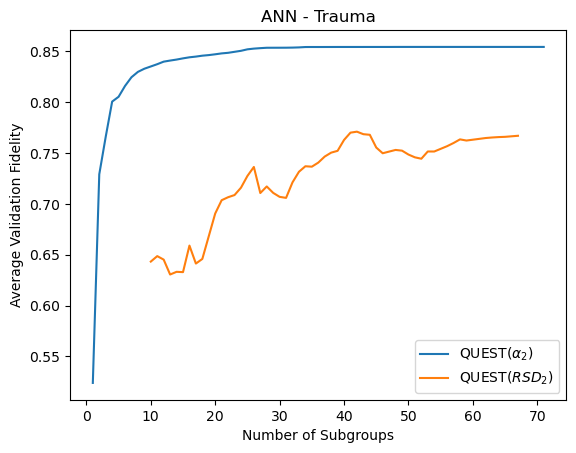

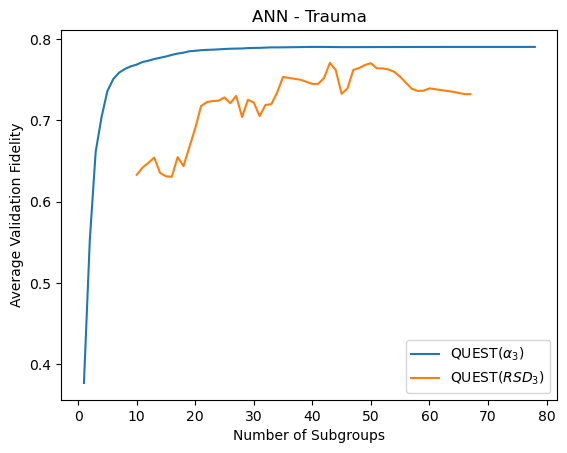

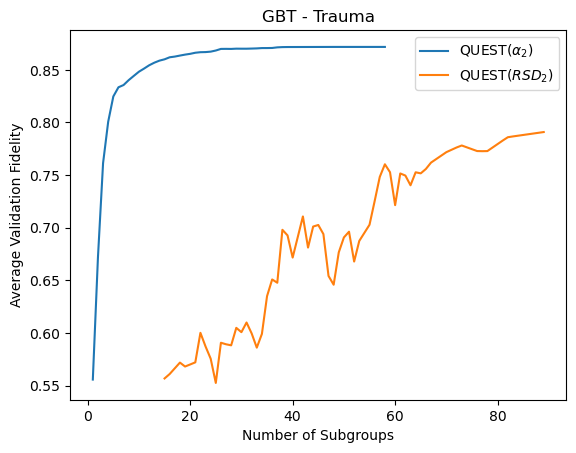

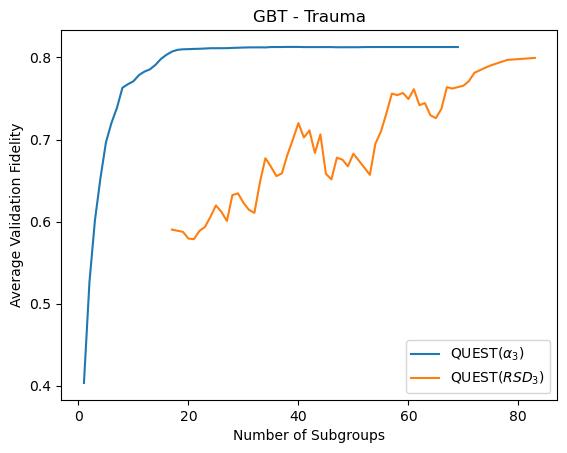

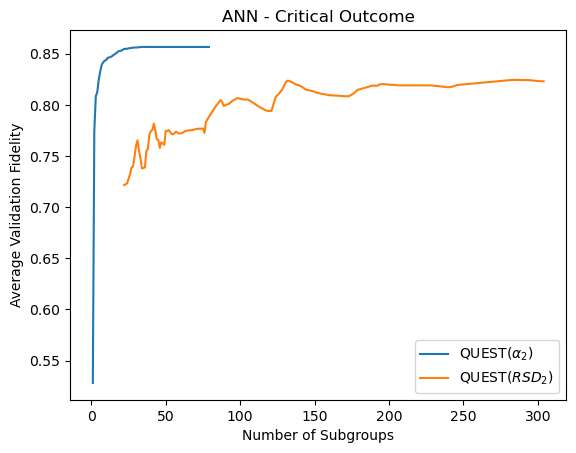

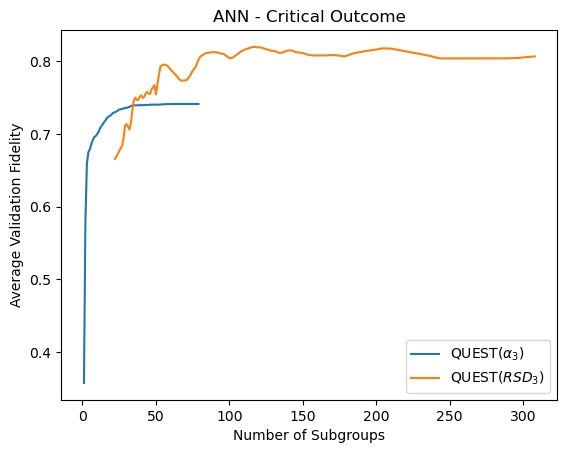

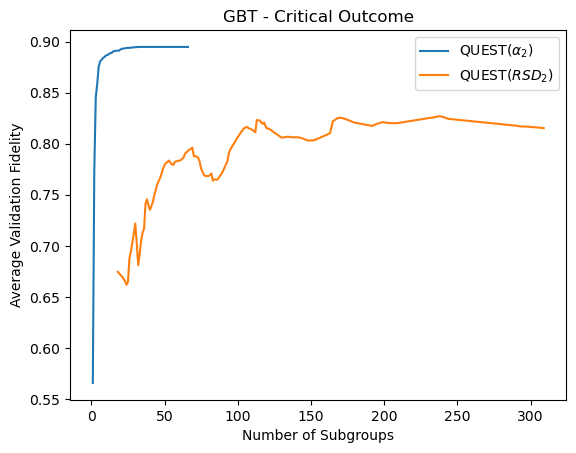

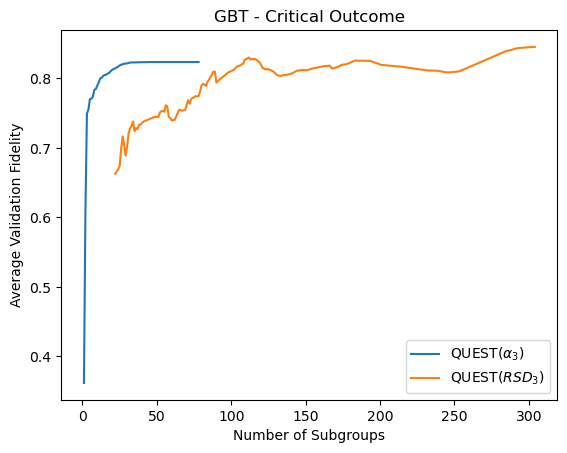

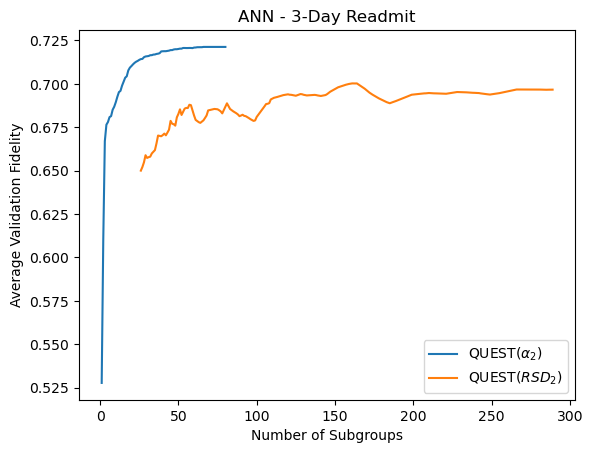

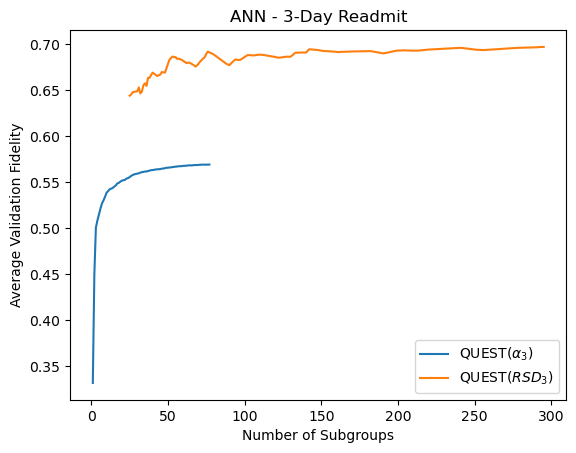

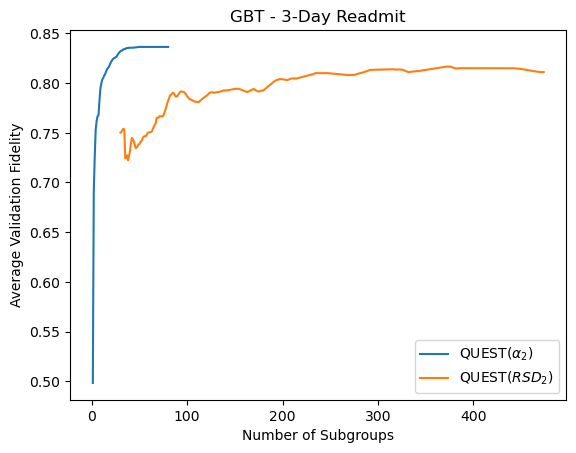

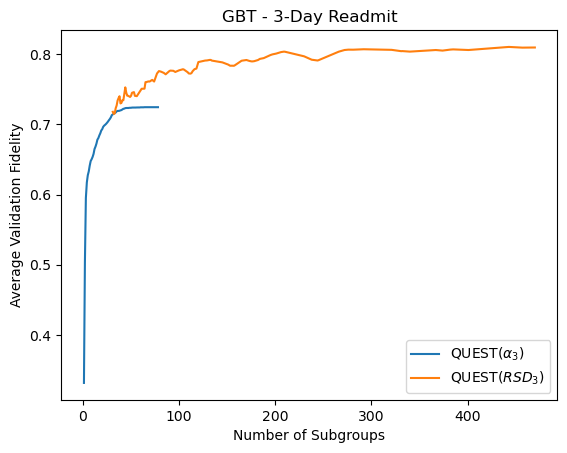

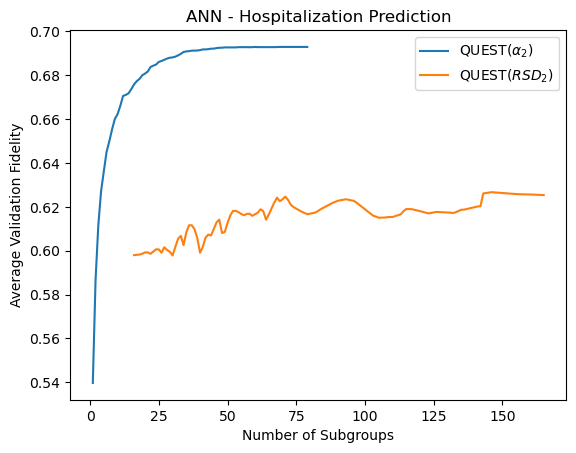

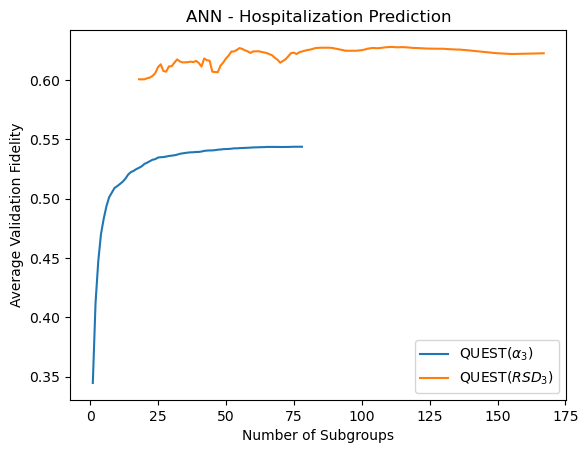

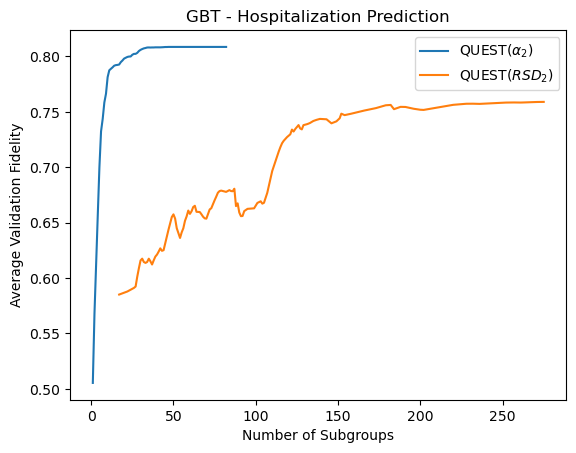

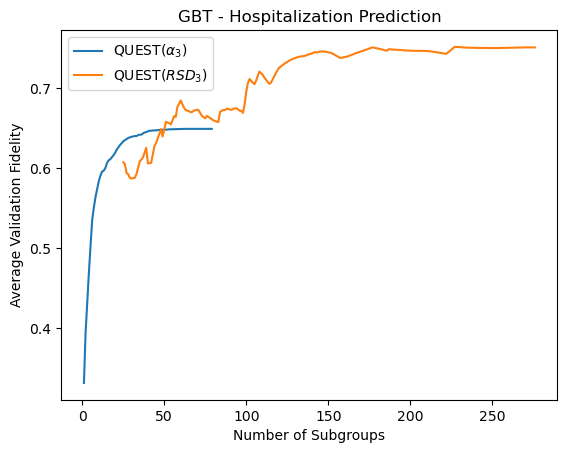

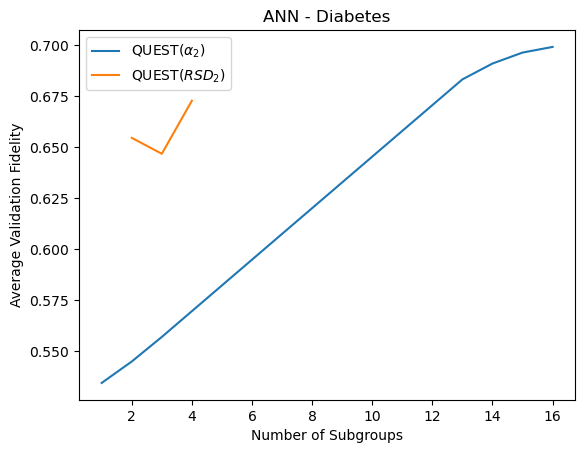

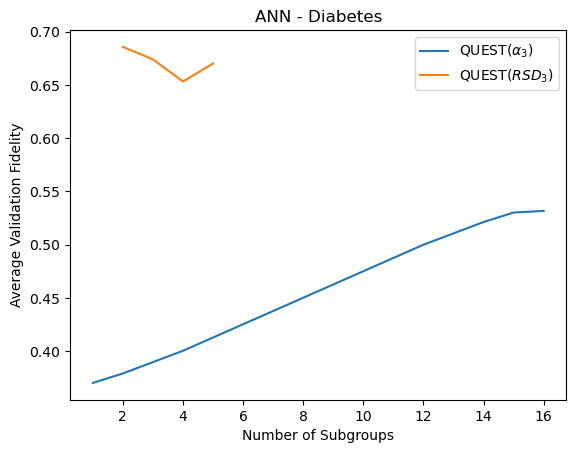

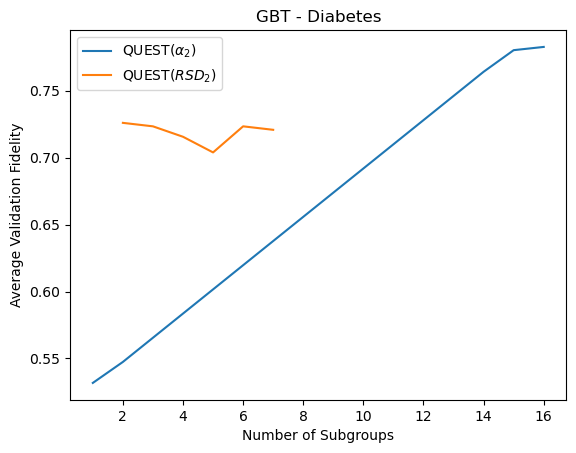

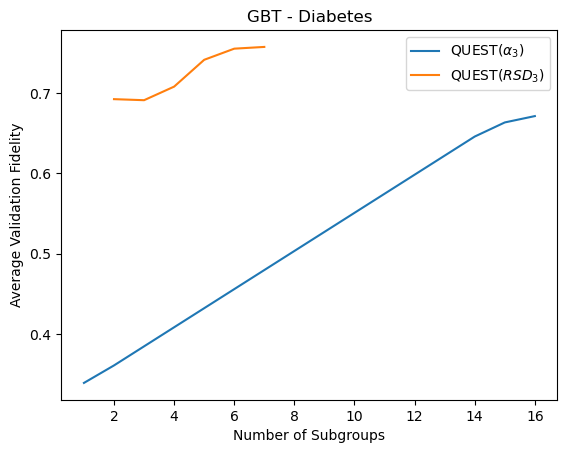

In [9]:
datasets = ["trauma_uk", "critical_outcome", "ED_3day_readmit", "hospitalization_prediction", "diabetes",]
models = ["NN-dropout", "catboost-ve"]
n_bins_lst = [2,3]
combos = itertools.product(datasets, models, n_bins_lst)
for d, m, n in combos:
    juxtaposed_plot(model=m, dataset=d, n_bins=n)